# English Premier League Results 1993-2018


In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi

sns.set_theme()

Place your Kaggle API token (kaggle.json) to *~/.kaggle/kaggle.json*

In [9]:
api = KaggleApi()
api.authenticate()

Downloading data file

In [14]:
api.dataset_download_file('thefc17/epl-results-19932018', 'EPL_Set.csv', './data')

True

In [28]:
df = pd.read_csv('data/EPL_Set.csv', parse_dates=['Date'])

In [29]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,1993-08-14,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,1993-08-14,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,1993-08-14,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,1993-08-14,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,1993-08-14,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [182]:
def annotate(plot, nformat):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), nformat),
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')


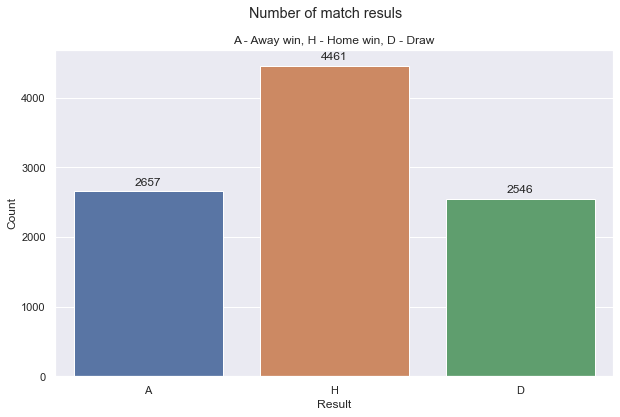

In [185]:
plt.figure(figsize=(10,6))
plot = sns.countplot(data=df, x='FTR')
annotate(plot, 'n')
plt.xlabel('Result')
plt.ylabel('Count')
plt.suptitle('Number of match resuls')
plt.title('A - Away win, H - Home win, D - Draw')
plt.show()

In [118]:
goals = pd.melt(df[['FTHG', 'FTAG']].reset_index(), id_vars='index', var_name="type", value_name="goals")
goals['type'] = goals['type'].map({'FTHG': 'Home team', 'FTAG': 'Away team'})

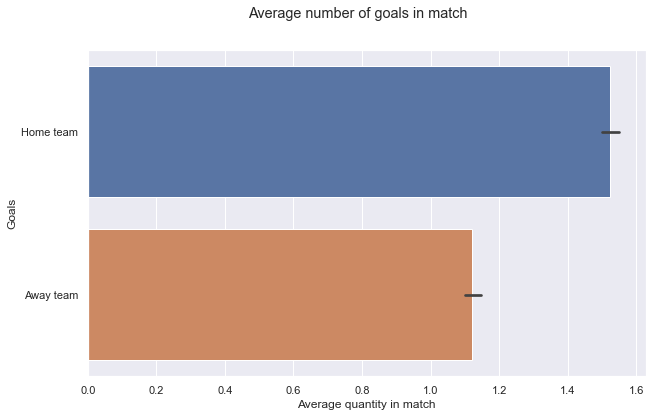

In [124]:
plt.figure(figsize=(10,6))
sns.barplot(data=goals, x='goals', y='type')
plt.xlabel('Average quantity in match')
plt.ylabel('Goals')
plt.suptitle('Average number of goals in match')
plt.show()

And now create new dataframe with a number of matches, home wins and away wins by season.

In [65]:
all_matches = df['Season'].value_counts().to_frame('matches')
home_wins = df[df['FTR'] == 'H']['Season'].value_counts().to_frame('home_wins')
away_wins = df[df['FTR'] == 'A']['Season'].value_counts().to_frame('away_wins')
results = pd.concat([all_matches, home_wins, away_wins], axis=1)
results.sort_index(inplace=True)

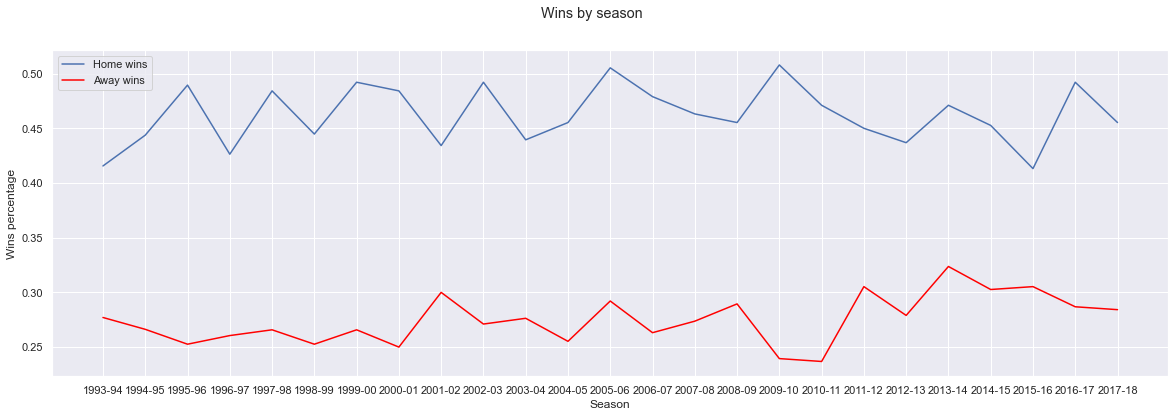

In [125]:
plt.figure(figsize=(20,6))
sns.lineplot(x=results.index, y=results['home_wins']/results['matches'])
sns.lineplot(x=results.index, y=results['away_wins']/results['matches'], color='red')
plt.xlabel('Season')
plt.ylabel('Wins percentage')
plt.suptitle('Wins by season')
plt.legend(['Home wins', 'Away wins'])
plt.show()

## Liverpool stats
Now let's look at single team stats. I'm going to plot **Liverpool**'s home wins by season.

In [154]:
liv_home = df[df['HomeTeam'] == 'Liverpool']
liv_hwins = liv_home[liv_home['FTR'] == 'H']

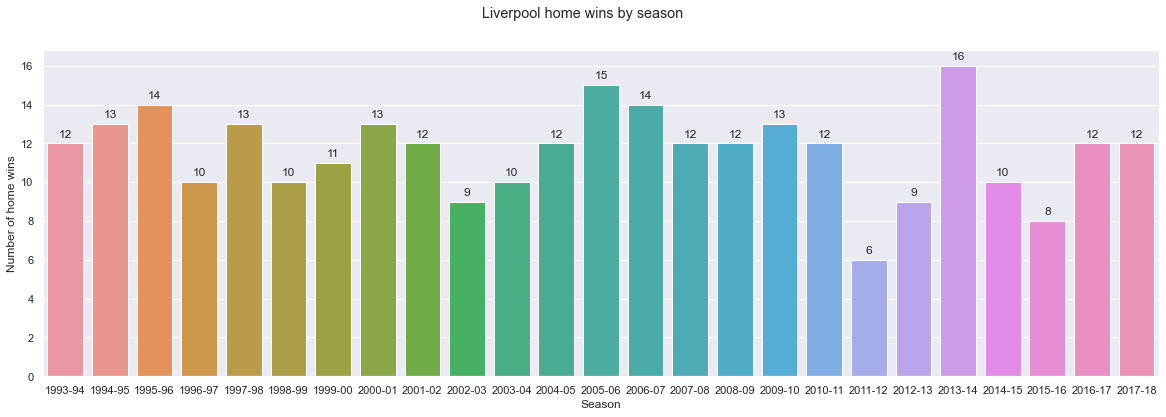

In [186]:
plt.figure(figsize=(20,6))
plot = sns.countplot(data=liv_hwins, x='Season')
annotate(plot, 'n')
plt.xlabel('Season')
plt.ylabel('Number of home wins')
plt.suptitle('Liverpool home wins by season')
plt.show()

Now same with home goals by season.

In [161]:
liv_hgoals = liv_home.groupby('Season')['FTHG'].sum().to_frame('goals')

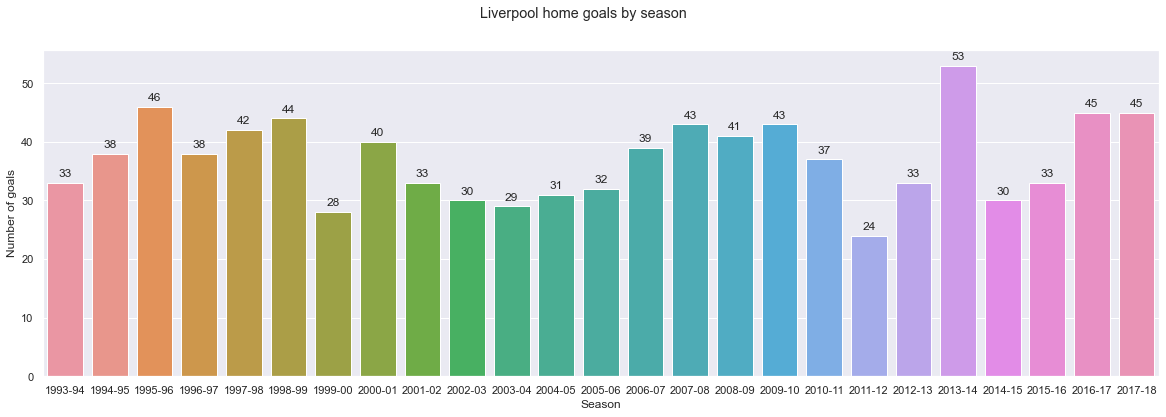

In [187]:
plt.figure(figsize=(20,6))
plot = sns.barplot(data=liv_hgoals, x=liv_hgoals.index, y='goals')
annotate(plot, 'n')
plt.xlabel('Season')
plt.ylabel('Number of goals')
plt.suptitle('Liverpool home goals by season')
plt.show()